In [2]:
from textwrap import wrap
import os

import keras_cv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.experimental.numpy as tnp
from keras_cv.models.stable_diffusion.clip_tokenizer import SimpleTokenizer
from keras_cv.models.stable_diffusion.diffusion_model import DiffusionModel
from keras_cv.models.stable_diffusion.image_encoder import ImageEncoder
from keras_cv.models.stable_diffusion.noise_scheduler import NoiseScheduler
from keras_cv.models.stable_diffusion.text_encoder import TextEncoder
from tensorflow import keras
from datasets import load_dataset

2023-03-11 15:25:46.733847: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/jlb638/cuda/lib64:/home/jlb638/packages/gdb/lib:/home/jlb638/packages/gcc/lib64:/home/jlb638/packages/gcc/lib:/home/jlb638/packages/gmp/5_0_2/include:/home/jlb638/packages/gmp/5_0_2/lib:/home/jlb638/texinfo/6_6/lib:/home/jlb638/gc563/python/3.9.6/lib:/home/jlb638/cuda/lib64:/home/jlb638/packages/gdb/lib:/home/jlb638/packages/gcc/lib64:/home/jlb638/packages/gcc/lib:/home/jlb638/packages/gmp/5_0_2/include:/home/jlb638/packages/gmp/5_0_2/lib:/home/jlb638/texinfo/6_6/lib:/home/jlb638/gc563/python/3.9.6/lib:
2023-03-11 15:25:46.733947: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/home/jlb638/.conda/envs/cvtf/lib/python3.9/site-packages/scipy/__init__.py:146

You do not have pycocotools installed, so KerasCV pycoco metrics are not available. Please run `pip install pycocotools`.


In [3]:
data_frame= load_dataset("jlbaker361/avatar-lite_captioned-augmented",split="train")

Using custom data configuration jlbaker361--avatar-lite_captioned-augmented-c48aceaadc68fd73
Found cached dataset parquet (/home/jlb638/.cache/huggingface/datasets/jlbaker361___parquet/jlbaker361--avatar-lite_captioned-augmented-c48aceaadc68fd73/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


In [4]:
text_encoder = TextEncoder(77)

2023-03-11 15:27:17.003679: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/jlb638/cuda/lib64:/home/jlb638/packages/gdb/lib:/home/jlb638/packages/gcc/lib64:/home/jlb638/packages/gcc/lib:/home/jlb638/packages/gmp/5_0_2/include:/home/jlb638/packages/gmp/5_0_2/lib:/home/jlb638/texinfo/6_6/lib:/home/jlb638/gc563/python/3.9.6/lib:/home/jlb638/cuda/lib64:/home/jlb638/packages/gdb/lib:/home/jlb638/packages/gcc/lib64:/home/jlb638/packages/gcc/lib:/home/jlb638/packages/gmp/5_0_2/include:/home/jlb638/packages/gmp/5_0_2/lib:/home/jlb638/texinfo/6_6/lib:/home/jlb638/gc563/python/3.9.6/lib:
2023-03-11 15:27:17.173855: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-11 15:27:17.173998: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be

In [5]:
data_frame["caption"][0][0]

'the moon in the sky'

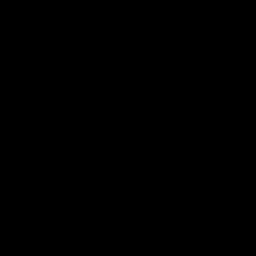

In [6]:
data_frame["image"][0]

In [8]:
len(data_frame["image"])

2031

In [9]:
len(data_frame["caption"])

2031

In [10]:
MAX_PROMPT_LENGTH = 77
PADDING_TOKEN = 49407
tokenizer = SimpleTokenizer()
def process_text(caption):
    tokens = tokenizer.encode(caption[0])
    tokens = tokens + [PADDING_TOKEN] * (MAX_PROMPT_LENGTH - len(tokens))
    return np.array(tokens)
tokenized_texts = np.empty((len(data_frame), MAX_PROMPT_LENGTH))

all_captions = data_frame["caption"]
for i, caption in enumerate(all_captions):
    tokenized_texts[i] = process_text(caption)

In [12]:
tokenized_texts.shape

(2031, 77)

In [15]:
np.array([np.array(img) for img in  data_frame["image"]])

array([[[[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        ...,

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
        